# Data Wrangling

This is the Wrangling and Analyze Data Project as part of the Udacity Data Analyst Nanodegree.

## Table of Contents
<ul>
<li><a href="# Step 0: Packages">Packages</a></li>
<li><a href="# Step 1:  Gathering Data">Gathering Data</a></li>
<li><a href="# Step 2: Assessing Data">Assessing Data</a></li>
<li><a href="# Step 3: Cleaning">Cleaning Data</a></li>
<li><a href="# Step 4: Storing Data">Storing Data</a></li>
<li><a href="# Step 5: Analyzing and Visualizing Data">Analyzing and Visualizing Data</a></li>
</ul>

# Step 0: Packages

In [345]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

import requests

import tweepy # Twitter API package
import json # JavaScript Object Notation

%matplotlib inline

# Step 1:  Gathering Data

## Load WeRateDogs Twitter archive data

In [346]:
df_twitter_archive = pd.read_csv('twitter-archive-enhanced.csv')

In [347]:
df_twitter_archive.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


## Tweet Image Prediction

In [348]:
# Import Image Predicition File from the Server using Request
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)

# Save file to image-predictions.tsv
with open('image-predictions.tsv', mode ='wb') as file:
    file.write(response.content)
    
# Imput data into dataframe
df_predictions = pd.read_csv('image-predictions.tsv', sep = '\t')

In [349]:
# check df_predictions
df_predictions.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


## Twitter API & JSON

In [350]:
# Reference: https://stackoverflow.com/questions/28384588/twitter-api-get-tweets-with-specific-id
# Reference 2: https://newbedev.com/how-to-create-a-pandas-dataframe-using-tweepy
# Reminder do not include the key, token and secret details in final submission
consumer_key = '***************************'
consumer_secret = '***************************'
access_token = '***************************'
access_secret = '***************************'

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

# Add parser = tweepy.parsers.JSONParser() as per https://github.com/tweepy/tweepy/issues/1102
# This fixes a later issue.
api = tweepy.API(auth_handler=auth,
                 parser=tweepy.parsers.JSONParser(),
                 wait_on_rate_limit=True, 
                 wait_on_rate_limit_notify=True)

In [351]:
# Question to reviewer: Is there anyway to speed this process up? Or is it just slow due to Twitter's API Rate Limits.

# Download tweets from twitter API via the following loop:
tweets_list = []
# Tweets that weren't automatically found will be stored in a seperate list:
tweets_not_found_list = []
for tweet_id in df_twitter_archive['tweet_id']:   
    try:
        tweets_list.append(api.get_status(tweet_id))
    except Exception as e:
        tweets_not_found_list.append(tweet_id)

Rate limit reached. Sleeping for: 733
Rate limit reached. Sleeping for: 731


In [352]:
# Checking length of the two lists
print("Tweet List Length:" ,len(tweets_list))
print("Tweets Not Found List Length:" , len(tweets_not_found_list))

Tweet List Length: 2328
Tweets Not Found List Length: 28


In [353]:
# Reference: https://newbedev.com/how-to-create-a-pandas-dataframe-using-tweepy
# Taking each of the downloaded tweepy status object we take the json data and add them into a list

my_list_of_dicts = []
for json_tweet_data in tweets_list:
    my_list_of_dicts.append(json_tweet_data)

In [354]:
# Reference: https://newbedev.com/how-to-create-a-pandas-dataframe-using-tweepy
# Write this list into a txt file:

with open('tweet_json.txt', 'w') as file:
        file.write(json.dumps(my_list_of_dicts, indent=4))

In [355]:
# Reference: https://newbedev.com/how-to-create-a-pandas-dataframe-using-tweepy
# Reference 2: https://stackoverflow.com/questions/28056171/how-to-build-and-fill-pandas-dataframe-from-for-loop/28058264#28058264
# Creating Dataframe from the tweet_json.txt file

my_demo_list = []
with open('tweet_json.txt', encoding='utf-8') as json_file:  
    all_data = json.load(json_file)
    for each_dictionary in all_data:
        tweet_id = each_dictionary['id']
        whole_tweet = each_dictionary['text']
        only_url = whole_tweet[whole_tweet.find('https'):]
        retweet_count = each_dictionary['retweet_count']
        favorite_count = each_dictionary['favorite_count']
        friends_count = each_dictionary['user']['friends_count']
        followers_count = each_dictionary['user']['followers_count']
        created_at = each_dictionary['created_at']
        whole_source = each_dictionary['source']
        only_device = whole_source[whole_source.find('rel="nofollow">') + 15:-4]
        source = only_device
        retweeted_status = each_dictionary['retweeted_status'] = each_dictionary.get('retweeted_status', 'Original tweet')
        if retweeted_status == 'Original tweet':
            url = only_url
        else:
            retweeted_status = 'This is a retweet'
            url = 'This is a retweet'

        my_demo_list.append({'tweet_id': str(tweet_id),
                             'retweet_count': int(retweet_count),
                             'favorite_count': int(favorite_count),
                            })
        tweet_json = pd.DataFrame(my_demo_list, columns = ['tweet_id', 'retweet_count', 'favorite_count'
                                                          ])

In [356]:
# Review json info summary
tweet_json.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2328 entries, 0 to 2327
Data columns (total 3 columns):
tweet_id          2328 non-null object
retweet_count     2328 non-null int64
favorite_count    2328 non-null int64
dtypes: int64(2), object(1)
memory usage: 54.6+ KB


In [357]:
# Review first 10 frows of json file
tweet_json.head(10)

,tweet_id,retweet_count,favorite_count
0,892420643555336193,7144,34369
1,892177421306343426,5375,29799
2,891815181378084864,3541,22413
3,891689557279858688,7347,37545
4,891327558926688256,7891,35881
5,891087950875897856,2655,18108
6,890971913173991426,1702,10540
7,890729181411237888,16064,57797
8,890609185150312448,3682,24942
9,890240255349198849,6200,28414


# Step 2: Assessing Data

## Manual Assessment

Note: We can look at the csv and tsv files with Microsoft Excel for an easier manual look at the files.

In [358]:
df_twitter_archive

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None


In [359]:
df_predictions

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,0.016199,True
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,Tibetan_mastiff,0.058279,True,fur_coat,0.054449,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201493,True,komondor,0.192305,True,soft-coated_wheaten_terrier,0.082086,True


In [360]:
tweet_json

,tweet_id,retweet_count,favorite_count
0,892420643555336193,7144,34369
1,892177421306343426,5375,29799
2,891815181378084864,3541,22413
3,891689557279858688,7347,37545
4,891327558926688256,7891,35881
5,891087950875897856,2655,18108
6,890971913173991426,1702,10540
7,890729181411237888,16064,57797
8,890609185150312448,3682,24942
9,890240255349198849,6200,28414


## Programmatic Assessment

First we'll look at the info summaries for the 3 data sets.

In [361]:
df_twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [362]:
df_twitter_archive.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [363]:
df_twitter_archive.tweet_id.nunique()

2356

In [364]:
df_twitter_archive.rating_denominator.value_counts()

10     2333
11        3
50        3
80        2
20        2
2         1
16        1
40        1
70        1
15        1
90        1
110       1
120       1
130       1
150       1
170       1
7         1
0         1
Name: rating_denominator, dtype: int64

In [365]:
df_twitter_archive.name.isnull().sum()

0

In [366]:
df_twitter_archive.name.value_counts()

None         745
a             55
Charlie       12
Cooper        11
Oliver        11
Lucy          11
Lola          10
Penny         10
Tucker        10
Bo             9
Winston        9
Sadie          8
the            8
an             7
Daisy          7
Buddy          7
Toby           7
Bailey         7
Milo           6
Jax            6
Stanley        6
Jack           6
Rusty          6
Oscar          6
Scout          6
Dave           6
Bella          6
Koda           6
Leo            6
Alfie          5
            ... 
Lugan          1
Joshwa         1
Nigel          1
Pilot          1
Jebberson      1
Severus        1
Dwight         1
Gerbald        1
Todo           1
Barclay        1
Bauer          1
Lupe           1
Karma          1
Benny          1
Vince          1
Yoda           1
Jennifur       1
Hall           1
Rascal         1
Brooks         1
Gin            1
Timmy          1
BeBe           1
Gilbert        1
light          1
Toffee         1
Alejandro      1
Gòrdón        

In [367]:
df_twitter_archive.rating_numerator.value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
1         9
2         9
420       2
0         2
15        2
75        2
80        1
20        1
24        1
26        1
44        1
50        1
60        1
165       1
84        1
88        1
144       1
182       1
143       1
666       1
960       1
1776      1
17        1
27        1
45        1
99        1
121       1
204       1
Name: rating_numerator, dtype: int64

In [368]:
df_twitter_archive.rating_numerator.isnull().sum()

0

In [369]:
df_twitter_archive.rating_denominator.value_counts()

10     2333
11        3
50        3
80        2
20        2
2         1
16        1
40        1
70        1
15        1
90        1
110       1
120       1
130       1
150       1
170       1
7         1
0         1
Name: rating_denominator, dtype: int64

In [370]:
df_predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [371]:
df_predictions.describe()
# The highest confidence levels are generally seen with p1 so that's the one we'll be using later on.

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [372]:
df_predictions.tweet_id.nunique()

2075

In [373]:
print(df_predictions.p1_dog.value_counts())
print(df_predictions.p2_dog.value_counts())
print(df_predictions.p3_dog.value_counts())

True     1532
False     543
Name: p1_dog, dtype: int64
True     1553
False     522
Name: p2_dog, dtype: int64
True     1499
False     576
Name: p3_dog, dtype: int64


In [374]:
tweet_json

,tweet_id,retweet_count,favorite_count
0,892420643555336193,7144,34369
1,892177421306343426,5375,29799
2,891815181378084864,3541,22413
3,891689557279858688,7347,37545
4,891327558926688256,7891,35881
5,891087950875897856,2655,18108
6,890971913173991426,1702,10540
7,890729181411237888,16064,57797
8,890609185150312448,3682,24942
9,890240255349198849,6200,28414


In [375]:
tweet_json.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2328 entries, 0 to 2327
Data columns (total 3 columns):
tweet_id          2328 non-null object
retweet_count     2328 non-null int64
favorite_count    2328 non-null int64
dtypes: int64(2), object(1)
memory usage: 54.6+ KB


In [376]:
tweet_json.describe()

,retweet_count,favorite_count
count,2328.000000,2328.000000
mean,2517.295962,7169.723797
std,4262.452724,11139.194720
min,1.000000,0.000000
25%,507.750000,1243.250000
50%,1171.000000,3099.000000
75%,2914.500000,8749.500000
max,72156.000000,147233.000000


In [377]:
tweet_json.tweet_id.nunique()

2328

In [378]:
combined_columns = pd.Series(list(df_twitter_archive) + list(df_predictions) + list(tweet_json))
combined_columns[combined_columns.duplicated()]

17    tweet_id
29    tweet_id
dtype: object

## Quality Issues

From our visual and programmatic assessments we can see the following issues with our data.

### Twitter Archive

 - We can see the NaN value (indicating blanks) repeatedly show up in the following columns: in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp, expanded urls
 - Some of the rating denominators are not 10. After manually going through these and filtering out replies and retweets we can see 5 that need fixed and 1 that needs deleted for lacking a rating at all.
  - Fix: After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https://t.co/XAVDNDaVgQ
  - Fix: Happy 4/20 from the squad! 13/10 for all https://t.co/eV1diwds8a
  - Fix: This is Bluebert. He just saw that both #FinalFur match ups are split 50/50. Amazed af. 11/10 https://t.co/Kky1DPG4iq
  - Fix: This is Darrel. He just robbed a 7/11 and is in a high speed police chase. Was just spotted by the helicopter 10/10 https://t.co/7EsP8LmSp5
  - Fix: This is an Albanian 3 1/2 legged  Episcopalian. Loves well-polished hardwood flooring. Penis on the collar. 9/10 https://t.co/d9NcXFKwLv
  - Delete: Meet Sam. She smiles 24/7 &amp; secretly aspires to be a reindeer.
 - A lot of the entries under the name column are not correct, the most predominate "None" & "a".
 - Tweet_id should be a string but is currently an integer.
 - The Timestamp is in object (string) format and should be in datetime format.
 - 181 lines of data need to be removed as they have a valid retweeted_status_user_id showing they're retweets.
 - 78 lines also need to be removed as they have a valid in_reply_to_status_id showing they're replies.
 - Multiple dog "stage" (doggo, floffer, pupper, puppo) columns aren't needed.

### Predictions

 - Again Tweet_id should be a string but is currently an integer.
 - Multiple predictions for dog type/breed are in each tweet, we don't need more than 1 prediction.
 - Some of the predictions aren't valid dog breeds.

### Tweet Json

 - No issues, we already have our counts as integers.

### Overall

 - The three datasets should be merged into a single dataset.

# Step 3: Cleaning

Note: Define-Code-Test framework

### Define

#### All
 - Make copies of each of the datasets.
 - Merge into a Masterfile.
 
#### Twitter Archive Data
 - Remove the 181 retweets.
 - Remove the 78 replies.
 - Convert the Timestamp from object to datetime format.
 - Convert Tweet_id from an integer to a string.
 - Manually fix the 5 with incorrect ratings based on their text.
 - Delete the entry with no score.
 - Create a new rating column based on the rating_numenator & rating_denominator. This should tidy up the non-10 valid denominators.

#### Predictions
 - Convert Tweet_id from an integer to a string.
 - Drop extra dog predictions, we only need p1 not p2 & p3.
 - Drop non-dog predictions.

#### Tweet Json
 - None.
 

### Code: Twitter Archive

In [379]:
# First create a copy of df_twitter_archive
df_twitter_archive_clean = df_twitter_archive.copy()

In [380]:
# Remove the 181 retweets
df_twitter_archive_clean = df_twitter_archive_clean[df_twitter_archive_clean['retweeted_status_id'].isnull()]

In [381]:
# Remove the associated retweet columns as we no longer need them.
# Reference - https://stackoverflow.com/questions/13411544/delete-a-column-from-a-pandas-dataframe
df_twitter_archive_clean.drop(columns = ['retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp'], inplace = True)

In [382]:
# Remove the 78 replies
df_twitter_archive_clean = df_twitter_archive_clean[df_twitter_archive_clean['in_reply_to_status_id'].isnull()]

In [383]:
# Remove the associated replies columns as we no longer need them.
df_twitter_archive_clean.drop(columns = ['in_reply_to_status_id', 'in_reply_to_user_id'], inplace = True)

In [384]:
# Convert the Timestamp from object to datetime format
df_twitter_archive_clean['timestamp'] = pd.to_datetime(df_twitter_archive_clean['timestamp'])

In [385]:
# Convert the Tweet_ID from an int to a str
# Note: Reference Material - https://stackoverflow.com/questions/17950374/converting-a-column-within-pandas-dataframe-from-int-to-string
df_twitter_archive_clean['tweet_id'] = df_twitter_archive_clean['tweet_id'].apply(str)

In [386]:
# Question To Reviewer: Is there a more automated way to do this?

# Manually locate the five ratings we have to update & the 1 to remove as mentioned earlier, 
# we know their denominators do not equal 10 so:
df_twitter_archive_clean[df_twitter_archive_clean['rating_denominator'] != 10]

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
433,820690176645140481,2017-01-15 17:52:40,"<a href=""http://twitter.com/download/iphone"" r...",The floofs have been released I repeat the flo...,https://twitter.com/dog_rates/status/820690176...,84,70,None,None,None,None,None
516,810984652412424192,2016-12-19 23:06:23,"<a href=""http://twitter.com/download/iphone"" r...",Meet Sam. She smiles 24/7 &amp; secretly aspir...,"https://www.gofundme.com/sams-smile,https://tw...",24,7,Sam,None,None,None,None
902,758467244762497024,2016-07-28 01:00:57,"<a href=""http://twitter.com/download/iphone"" r...",Why does this never happen at my front door......,https://twitter.com/dog_rates/status/758467244...,165,150,None,None,None,None,None
1068,740373189193256964,2016-06-08 02:41:38,"<a href=""http://twitter.com/download/iphone"" r...","After so many requests, this is Bretagne. She ...",https://twitter.com/dog_rates/status/740373189...,9,11,None,None,None,None,None
1120,731156023742988288,2016-05-13 16:15:54,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to this unbelievably well behaved sq...,https://twitter.com/dog_rates/status/731156023...,204,170,this,None,None,None,None
1165,722974582966214656,2016-04-21 02:25:47,"<a href=""http://twitter.com/download/iphone"" r...",Happy 4/20 from the squad! 13/10 for all https...,https://twitter.com/dog_rates/status/722974582...,4,20,None,None,None,None,None
1202,716439118184652801,2016-04-03 01:36:11,"<a href=""http://twitter.com/download/iphone"" r...",This is Bluebert. He just saw that both #Final...,https://twitter.com/dog_rates/status/716439118...,50,50,Bluebert,None,None,None,None
1228,713900603437621249,2016-03-27 01:29:02,"<a href=""http://twitter.com/download/iphone"" r...",Happy Saturday here's 9 puppers on a bench. 99...,https://twitter.com/dog_rates/status/713900603...,99,90,None,None,None,None,None
1254,710658690886586372,2016-03-18 02:46:49,"<a href=""http://twitter.com/download/iphone"" r...",Here's a brigade of puppers. All look very pre...,https://twitter.com/dog_rates/status/710658690...,80,80,None,None,None,None,None
1274,709198395643068416,2016-03-14 02:04:08,"<a href=""http://twitter.com/download/iphone"" r...","From left to right:\nCletus, Jerome, Alejandro...",https://twitter.com/dog_rates/status/709198395...,45,50,None,None,None,None,None


From the above it's easy to locate the lines in question.
 - The 5 to modify are:
  - 1068 = After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https://t.co/XAVDNDaVgQ
  - 1165 = Happy 4/20 from the squad! 13/10 for all https://t.co/eV1diwds8a
  - 1202 = This is Bluebert. He just saw that both #FinalFur match ups are split 50/50. Amazed af. 11/10 https://t.co/Kky1DPG4iq
  - 1662 = This is Darrel. He just robbed a 7/11 and is in a high speed police chase. Was just spotted by the helicopter 10/10 https://t.co/7EsP8LmSp5
  - 2335 = This is an Albanian 3 1/2 legged  Episcopalian. Loves well-polished hardwood flooring. Penis on the collar. 9/10 https://t.co/d9NcXFKwLv
 - The 1 to delete:
  - 516 = Meet Sam. She smiles 24/7 &amp; secretly aspires to be a reindeer.

In [387]:
# Modify the 5 incorrect ratings.
df_twitter_archive_clean.loc[1068, ['rating_numerator', 'rating_denominator']] = 14, 10
df_twitter_archive_clean.loc[1165, ['rating_numerator', 'rating_denominator']] = 13, 10
df_twitter_archive_clean.loc[1202, ['rating_numerator', 'rating_denominator']] = 11, 10
df_twitter_archive_clean.loc[1662, ['rating_numerator', 'rating_denominator']] = 10, 10
df_twitter_archive_clean.loc[2335, ['rating_numerator', 'rating_denominator']] = 9, 10

In [388]:
# Remove the 1 incorrect rating
# Reference = https://stackoverflow.com/questions/13411544/delete-a-column-from-a-pandas-dataframe

df_twitter_archive_clean = df_twitter_archive_clean.drop(516, 0)

In [389]:
# For tidiness we create a new rating score column using the existing numerators and denominators (numerator divided by denominator)
df_twitter_archive_clean['rating'] = df_twitter_archive_clean['rating_numerator'] / df_twitter_archive_clean['rating_denominator']

In [390]:
# We can now remove the old rating columns.
df_twitter_archive_clean.drop(columns = ['rating_numerator', 'rating_denominator'], inplace = True)

Next we have to start the steps to merge the dog stage columns for the sake of tidiness.
 - First replace all the "None" entries with a blank.
 - Merge all the columns into a new single column.
 - Break up the merged columns with commas and spaces for tidiness.
 - Drop the old columns.

In [391]:
# To replace all the "None" entries with blanks.
# Reference: https://stackoverflow.com/questions/27060098/replacing-few-values-in-a-pandas-dataframe-column-with-another-value
df_twitter_archive_clean.replace({
    'doggo': {
        'None': ''
    },
    'floofer': {
        'None': ''
    },
    'pupper': {
        'None': ''
    },
    'puppo': {
        'None': ''
    }
},
    inplace = True)

In [392]:
# Now to combine the actual entries (now the blanks are removed) into a new single column we'll call "dog_stage"
df_twitter_archive_clean['dog_stage'] = df_twitter_archive_clean.doggo + df_twitter_archive_clean.floofer + df_twitter_archive_clean.pupper + df_twitter_archive_clean.puppo

In [393]:
# Now we are going to have a lot of new combination so we need to review this before knowing how to proceed.
df_twitter_archive_clean['dog_stage'].value_counts()

                1760
pupper           221
doggo             72
puppo             23
floofer            9
doggopupper        9
doggofloofer       1
doggopuppo         1
Name: dog_stage, dtype: int64

So from the above we can see that we need to tidy up the doggopupper, doggofloffer & doggopuppo entries.

In [394]:
df_twitter_archive_clean["dog_stage"].replace({"doggopupper": "doggo, pupper", "doggofloofer": "doggo, floofer", 
                                               "doggopuppo": "doggo, puppo"}, inplace=True)

In [395]:
df_twitter_archive_clean.replace({
    'dog_stage': {
        '': np.nan
    }
},
    inplace = True)

In [396]:
# Drop the old columns.
df_twitter_archive_clean.drop(columns = ['doggo', 'floofer','pupper','puppo'], inplace = True)

### Test: Twitter Archive

In [397]:
# Checking the only columns left are the ones we want.
df_twitter_archive_clean.head()

,tweet_id,timestamp,source,text,expanded_urls,name,rating,dog_stage
0,892420643555336193,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,Phineas,1.3,NaN
1,892177421306343426,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,Tilly,1.3,NaN
2,891815181378084864,2017-07-31 00:18:03,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,Archie,1.2,NaN
3,891689557279858688,2017-07-30 15:58:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,Darla,1.3,NaN
4,891327558926688256,2017-07-29 16:00:24,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,Franklin,1.2,NaN


In [398]:
# Checking that the column data types are matching up properly.
df_twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2096 entries, 0 to 2355
Data columns (total 8 columns):
tweet_id         2096 non-null object
timestamp        2096 non-null datetime64[ns]
source           2096 non-null object
text             2096 non-null object
expanded_urls    2093 non-null object
name             2096 non-null object
rating           2096 non-null float64
dog_stage        336 non-null object
dtypes: datetime64[ns](1), float64(1), object(6)
memory usage: 147.4+ KB


In [399]:
# Check if the new dog_stage column works
df_twitter_archive_clean['dog_stage'].value_counts()

pupper            221
doggo              72
puppo              23
floofer             9
doggo, pupper       9
doggo, floofer      1
doggo, puppo        1
Name: dog_stage, dtype: int64

### Code: Predictions

In [400]:
# Create a copy of predictions to clean.
df_predictions_clean = df_predictions.copy()

In [401]:
# Convert the Tweet_id from an integer to a string.
df_predictions_clean['tweet_id'] = df_predictions_clean['tweet_id'].apply(str)

In [402]:
# Drop p2 & p3 columns as we only need to retain p1
df_predictions_clean = df_predictions_clean.drop(columns = ['p2', 'p2_conf', 'p2_dog', 'p3', 'p3_conf', 'p3_dog'])

In [403]:
# We can now remove the p1_dog = "False" rows to remove all the non-dog predictions.
df_predictions_clean = df_predictions_clean[df_predictions_clean['p1_dog'] == True]

### Code: Tweet Json

In [404]:
# No changes needed, just create clean copy.
tweet_json_clean = tweet_json.copy()

### Test: Tweet Json

In [405]:
tweet_json_clean.head()

,tweet_id,retweet_count,favorite_count
0,892420643555336193,7144,34369
1,892177421306343426,5375,29799
2,891815181378084864,3541,22413
3,891689557279858688,7347,37545
4,891327558926688256,7891,35881


In [406]:
# Convert data type from object to integer.
tweet_json_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2328 entries, 0 to 2327
Data columns (total 3 columns):
tweet_id          2328 non-null object
retweet_count     2328 non-null int64
favorite_count    2328 non-null int64
dtypes: int64(2), object(1)
memory usage: 54.6+ KB


### Code: Merging to create Master Dataframe.

In [407]:
# Extra guidance = https://towardsdatascience.com/left-join-with-pandas-data-frames-in-python-c29c85089ba4
# Merge the 3 clean dataframes using left join on the tweet_id

df_twitter_master = df_twitter_archive_clean.merge(df_predictions_clean, how = 'left', on = 'tweet_id')
df_twitter_master = df_twitter_master.merge(tweet_json_clean, how = 'left', on = 'tweet_id')

### Test: Twitter Master

In [408]:
df_twitter_master.head()

,tweet_id,timestamp,source,text,expanded_urls,name,rating,dog_stage,jpg_url,img_num,p1,p1_conf,p1_dog,retweet_count,favorite_count
0,892420643555336193,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,Phineas,1.3,NaN,NaN,NaN,NaN,NaN,NaN,7144.0,34369.0
1,892177421306343426,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,Tilly,1.3,NaN,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1.0,Chihuahua,0.323581,True,5375.0,29799.0
2,891815181378084864,2017-07-31 00:18:03,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,Archie,1.2,NaN,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1.0,Chihuahua,0.716012,True,3541.0,22413.0
3,891689557279858688,2017-07-30 15:58:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,Darla,1.3,NaN,NaN,NaN,NaN,NaN,NaN,7347.0,37545.0
4,891327558926688256,2017-07-29 16:00:24,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,Franklin,1.2,NaN,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2.0,basset,0.555712,True,7891.0,35881.0


In [409]:
df_twitter_master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2096 entries, 0 to 2095
Data columns (total 15 columns):
tweet_id          2096 non-null object
timestamp         2096 non-null datetime64[ns]
source            2096 non-null object
text              2096 non-null object
expanded_urls     2093 non-null object
name              2096 non-null object
rating            2096 non-null float64
dog_stage         336 non-null object
jpg_url           1462 non-null object
img_num           1462 non-null float64
p1                1462 non-null object
p1_conf           1462 non-null float64
p1_dog            1462 non-null object
retweet_count     2088 non-null float64
favorite_count    2088 non-null float64
dtypes: datetime64[ns](1), float64(5), object(9)
memory usage: 262.0+ KB


In [410]:
# Non-dog predictions are removed.
df_twitter_master[df_twitter_master.p1_dog == False]

,tweet_id,timestamp,source,text,expanded_urls,name,rating,dog_stage,jpg_url,img_num,p1,p1_conf,p1_dog,retweet_count,favorite_count


In [411]:
# The data missing a score has been removed.
df_twitter_master[df_twitter_master['text'] == 'Meet Sam. She smiles 24/7 & secretly aspires to be a reindeer.'] 

,tweet_id,timestamp,source,text,expanded_urls,name,rating,dog_stage,jpg_url,img_num,p1,p1_conf,p1_dog,retweet_count,favorite_count


In [412]:
df_twitter_master[df_twitter_master['text'] == 'After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https://t.co/XAVDNDaVgQ']

,tweet_id,timestamp,source,text,expanded_urls,name,rating,dog_stage,jpg_url,img_num,p1,p1_conf,p1_dog,retweet_count,favorite_count
852,740373189193256964,2016-06-08 02:41:38,"<a href=""http://twitter.com/download/iphone"" r...","After so many requests, this is Bretagne. She ...",https://twitter.com/dog_rates/status/740373189...,None,1.4,NaN,https://pbs.twimg.com/media/CkZVdJ6WYAAXZ5A.jpg,3.0,golden_retriever,0.807644,True,12367.0,33122.0


In [413]:
df_twitter_master[df_twitter_master['text'] == 'Happy 4/20 from the squad! 13/10 for all https://t.co/eV1diwds8a']

,tweet_id,timestamp,source,text,expanded_urls,name,rating,dog_stage,jpg_url,img_num,p1,p1_conf,p1_dog,retweet_count,favorite_count
947,722974582966214656,2016-04-21 02:25:47,"<a href=""http://twitter.com/download/iphone"" r...",Happy 4/20 from the squad! 13/10 for all https...,https://twitter.com/dog_rates/status/722974582...,None,1.3,NaN,https://pbs.twimg.com/media/CgiFjIpWgAA4wVp.jpg,1.0,Great_Dane,0.246762,True,1459.0,3845.0


In [414]:
df_twitter_master[df_twitter_master['text'] == 'This is Bluebert. He just saw that both #FinalFur match ups are split 50/50. Amazed af. 11/10 https://t.co/Kky1DPG4iq']

,tweet_id,timestamp,source,text,expanded_urls,name,rating,dog_stage,jpg_url,img_num,p1,p1_conf,p1_dog,retweet_count,favorite_count
984,716439118184652801,2016-04-03 01:36:11,"<a href=""http://twitter.com/download/iphone"" r...",This is Bluebert. He just saw that both #Final...,https://twitter.com/dog_rates/status/716439118...,Bluebert,1.1,NaN,https://pbs.twimg.com/media/CfFNk7cWAAA-hND.jpg,1.0,Siberian_husky,0.396495,True,196.0,2243.0


In [415]:
df_twitter_master[df_twitter_master['text'] == 'This is Darrel. He just robbed a 7/11 and is in a high speed police chase. Was just spotted by the helicopter 10/10 https://t.co/7EsP8LmSp5']

,tweet_id,timestamp,source,text,expanded_urls,name,rating,dog_stage,jpg_url,img_num,p1,p1_conf,p1_dog,retweet_count,favorite_count
1425,682962037429899265,2016-01-01 16:30:13,"<a href=""http://twitter.com/download/iphone"" r...",This is Darrel. He just robbed a 7/11 and is i...,https://twitter.com/dog_rates/status/682962037...,Darrel,1.0,NaN,NaN,NaN,NaN,NaN,NaN,15177.0,34451.0


In [416]:
df_twitter_master[df_twitter_master['text'] == 'This is an Albanian 3 1/2 legged Episcopalian. Loves well-polished hardwood flooring. Penis on the collar. 9/10 https://t.co/d9NcXFKwLv']

,tweet_id,timestamp,source,text,expanded_urls,name,rating,dog_stage,jpg_url,img_num,p1,p1_conf,p1_dog,retweet_count,favorite_count


#### Cleaning Review
 - Retweets and the associated columns have been removed.
 - Replies and the associated columns have been removed.
 - timestamp has been converted to a datetime format.
 - tweet_id has been converted from integer to a string on both source tables (Twitter Archive & Predictions).
 - The ratings have been fixed.
     - 5 manually fixed to align with the text.
         - The last of these has dropped off due to the merging of the files.
     - 1 removed as the text lacked a score.
     - Created a new "standardised" rating column so that the varied denominators don't cause tidiness issues.
     - Removed the old unneeded rating columns.
 - Dropped the extra dog predictions columns (p2 & p3) utilising the p1 data.
 - Using the p1 data we can filter out and drop the non-dog predictions (p1_dog column).

# Step 4: Storing Data

In [417]:
# Guidance = https://stackoverflow.com/questions/16923281/writing-a-pandas-dataframe-to-csv-file
# Store the final file as a csv.

df_twitter_master.to_csv("twitter_archive_master.csv", index = False)

# Step 5: Analyzing and Visualizing Data

#### Questions We'll Look To Answer

 1) Which rating is the most common as calculated by our new standardised/uniform rating column.
 
 2) The most popular dog breed.
 
 3) The most popular twitter source for users to interact with WeRateDogs.
 
 4) The correlation between Ratings & Number of Retweets
 
 5) The correlation between Ratings & Number of Favorite

In [418]:
# The data we're looking at.
df_twitter_master.head()

,tweet_id,timestamp,source,text,expanded_urls,name,rating,dog_stage,jpg_url,img_num,p1,p1_conf,p1_dog,retweet_count,favorite_count
0,892420643555336193,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,Phineas,1.3,NaN,NaN,NaN,NaN,NaN,NaN,7144.0,34369.0
1,892177421306343426,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,Tilly,1.3,NaN,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1.0,Chihuahua,0.323581,True,5375.0,29799.0
2,891815181378084864,2017-07-31 00:18:03,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,Archie,1.2,NaN,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1.0,Chihuahua,0.716012,True,3541.0,22413.0
3,891689557279858688,2017-07-30 15:58:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,Darla,1.3,NaN,NaN,NaN,NaN,NaN,NaN,7347.0,37545.0
4,891327558926688256,2017-07-29 16:00:24,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,Franklin,1.2,NaN,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2.0,basset,0.555712,True,7891.0,35881.0


In [419]:
df_twitter_master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2096 entries, 0 to 2095
Data columns (total 15 columns):
tweet_id          2096 non-null object
timestamp         2096 non-null datetime64[ns]
source            2096 non-null object
text              2096 non-null object
expanded_urls     2093 non-null object
name              2096 non-null object
rating            2096 non-null float64
dog_stage         336 non-null object
jpg_url           1462 non-null object
img_num           1462 non-null float64
p1                1462 non-null object
p1_conf           1462 non-null float64
p1_dog            1462 non-null object
retweet_count     2088 non-null float64
favorite_count    2088 non-null float64
dtypes: datetime64[ns](1), float64(5), object(9)
memory usage: 262.0+ KB


In [420]:
df_twitter_master.describe()

,rating,img_num,p1_conf,retweet_count,favorite_count
count,2096.000000,1462.000000,1462.000000,2088.000000,2088.000000
mean,1.169418,1.212722,0.614867,2349.333333,7911.934866
std,3.966472,0.573689,0.260251,4115.935914,11517.338128
min,0.000000,1.000000,0.044333,11.000000,67.000000
25%,1.000000,1.000000,0.392734,520.750000,1748.000000
50%,1.100000,1.000000,0.615709,1137.000000,3597.500000
75%,1.200000,1.000000,0.853256,2674.000000,9875.000000
max,177.600000,4.000000,0.999956,72156.000000,147233.000000


In [421]:
# We can see from the above that the range of the rating score is a little ridiculous (0 to 177.6)
# Manual look at the csv file shows that after 1.4 there are 5 outliers going up to 177.6
# Removing these outliers will give us a more trustworthy dataset. We'll try a cut off at 1.5.

df_twitter_master = df_twitter_master[df_twitter_master['rating'] <= 1.5]

In [422]:
df_twitter_master.describe()

,rating,img_num,p1_conf,retweet_count,favorite_count
count,2091.000000,1459.000000,1459.000000,2083.000000,2083.000000
mean,1.061071,1.213160,0.614862,2346.403265,7905.549208
std,0.214912,0.574198,0.260305,4118.223579,11523.697807
min,0.000000,1.000000,0.044333,11.000000,67.000000
25%,1.000000,1.000000,0.392321,520.500000,1748.000000
50%,1.100000,1.000000,0.615741,1135.000000,3589.000000
75%,1.200000,1.000000,0.853227,2672.000000,9848.000000
max,1.400000,4.000000,0.999956,72156.000000,147233.000000


#### 1) The Most Common Dog Rating

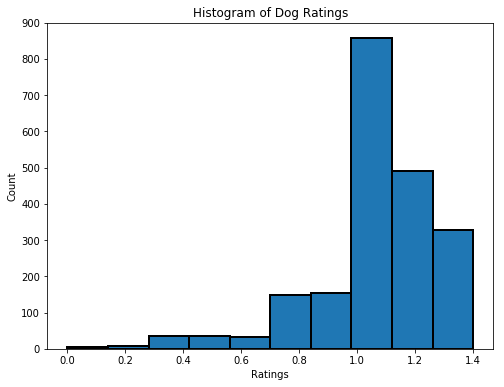

In [423]:
# Ratings
plt.figure(figsize = (8, 6))
plt.xlabel('Ratings')
plt.ylabel('Count')
bins = [0, .1, .2, .3, .4, .5, .6, .7, .8, .9, 1.0, 1.1, 1.2, 1.3, 1.4]
plt.hist(x = df_twitter_master.rating, 
         edgecolor='black', linewidth=2)
plt.title('Histogram of Dog Ratings');

Text(0.5,1,'Boxplot of Dog Ratings')

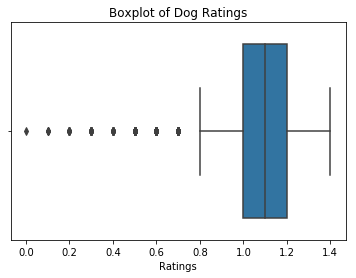

In [424]:
# Ratings 2
sb.boxplot(x = df_twitter_master.rating);
plt.xlabel('Ratings')
plt.title('Boxplot of Dog Ratings')

In [425]:
df_twitter_master.loc[df_twitter_master.rating.between(0,1.5), 'rating'].count()

2091

In [426]:
df_twitter_master.loc[df_twitter_master.rating.between(1,1.1), 'rating'].count()

857

In [427]:
df_twitter_master.loc[df_twitter_master.rating.between(1,1.4), 'rating'].count()

1674

In [428]:
(857/2091)*100

40.98517455762793

In [429]:
(1674/2091)*100

80.0573888091822

 ##### 1) Summary
 - The majority of ratings fall within the 1.0-1.1 range, making up 40.99% of the total amount of ratings.
 - Most of the scores are equal to 1 or greater making up 80.06% of the total amount.
 - Meaning just over 4/5 of users gave a rating of 1.0 or more.

#### 2) The Most Popular Dog Breed

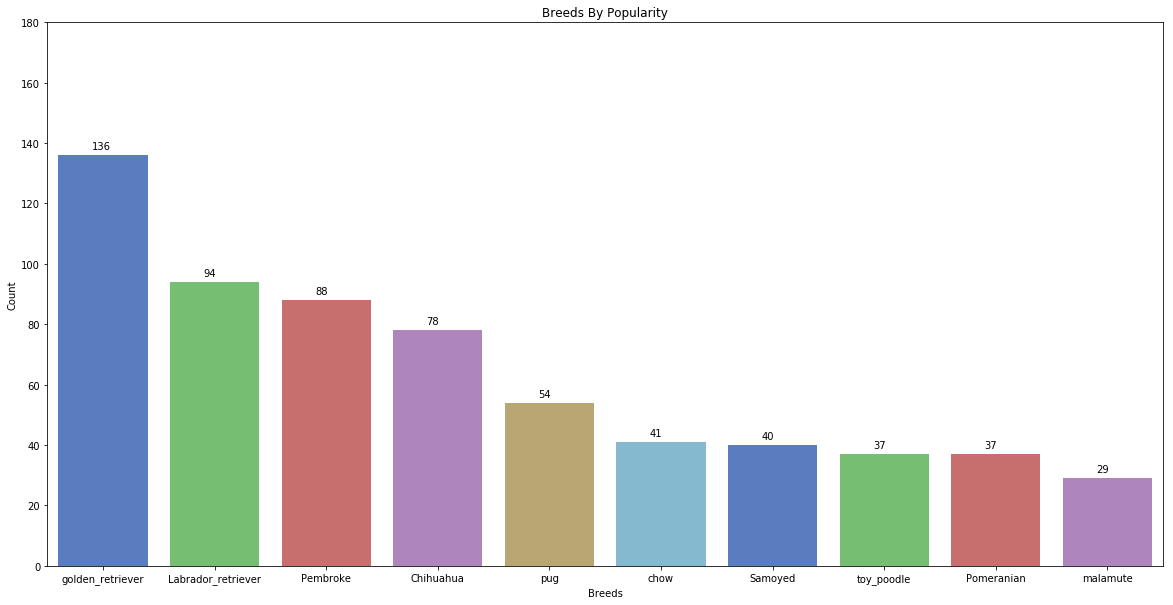

In [430]:
#Reference 1 = https://stackoverflow.com/questions/33179122/seaborn-countplot-with-frequencies
#Reference 2 = https://stackoverflow.com/questions/55104819/display-count-on-top-of-seaborn-barplot
#Reference 3 = https://stackoverflow.com/questions/32891211/limit-the-number-of-groups-shown-in-seaborn-countplot
#Reference 4 = https://stackoverflow.com/questions/54557423/series-object-has-no-attribute-values-counts/54557515

fig, ax = plt.subplots(figsize=(20,10))

ax = sb.countplot(x="p1", data = df_twitter_master, order=df_twitter_master.p1.value_counts().iloc[:10].index, palette = "muted")

ax.set_title('Breeds By Popularity')
ax.set_xlabel('Breeds')
ax.set_ylabel('Count')

ax.set_ylim(0,180)

for p in ax.patches:
    ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.3, p.get_height()+2))

 - From the graph we can see that the most common dog breed shown in the images was Golden Retrievers, with a count of 136.
 - The second most popular was Labrador Retriever with 94.
 - We limited this visual to the top 10 so as to keep the graph clean.

In [431]:
# Breed as ordered by Favorite Count, use top 10 only to keep in line with the graph.
df_breed_favorite = df_twitter_master[["favorite_count", "p1"]].groupby("p1", as_index = False).sum()
df_breed_favorite.sort_values("favorite_count", ascending = False).head(10)

,p1,favorite_count
86,golden_retriever,1492997.0
35,Labrador_retriever,919482.0
47,Pembroke,882282.0
15,Chihuahua,606480.0
53,Samoyed,455282.0
22,French_bulldog,415385.0
79,chow,359542.0
98,pug,275994.0
80,cocker_spaniel,272767.0
48,Pomeranian,251318.0


 - From the Favorite Count we can see Golden Retriever is the most favorited again with Labrador Retriever coming in 2nd once more.
 - The Top 10 order is not he exact same as the graph count but the first four are the same and in the same order.

In [432]:
# Breed as ordered by Retweet Count, use top 10 only to keep in line with the graph.
df_breed_retweet = df_twitter_master[["retweet_count", "p1"]].groupby("p1", as_index = False).sum()
df_breed_retweet.sort_values("retweet_count", ascending = False).head(10)

,p1,retweet_count
86,golden_retriever,414672.0
35,Labrador_retriever,284637.0
47,Pembroke,231795.0
15,Chihuahua,185918.0
53,Samoyed,144126.0
22,French_bulldog,99988.0
79,chow,97264.0
48,Pomeranian,82983.0
80,cocker_spaniel,82014.0
21,Eskimo_dog,80914.0


 - From the Retweet Count we once again see that Golden Retriever is the most retweeted with Labrador Retriever second again.  
 - Although the order is not the exact same we order for the top 7.

In [433]:
# Now looking at the most favorited in a single tweet (using a single value from the favorite_count column).
df_twitter_master[["retweet_count", "favorite_count", "p1"]].sort_values("favorite_count", ascending = False).head(6)

,retweet_count,favorite_count,p1
824,72156.0,147233.0,Labrador_retriever
325,40737.0,126176.0,Lakeland_terrier
418,52694.0,113716.0,Chihuahua
115,30819.0,110645.0,French_bulldog
863,53867.0,109007.0,Eskimo_dog
60,38119.0,94385.0,English_springer


In [434]:
# Now looking at the most retweeted in a single tweet (using a single value from the retweet_count column).
df_twitter_master[["retweet_count", "favorite_count", "p1"]].sort_values("retweet_count", ascending = False).head(6)

,retweet_count,favorite_count,p1
824,72156.0,147233.0,Labrador_retriever
863,53867.0,109007.0,Eskimo_dog
418,52694.0,113716.0,Chihuahua
325,40737.0,126176.0,Lakeland_terrier
60,38119.0,94385.0,English_springer
350,35174.0,84004.0,standard_poodle


 - Interestingly from these two pieces of data we see that when it comes to single tweets the Golden Retriever isn't even in the top 6.
 - Instead here we see that Labrador Retriever which has been second on our other popularity measures is both the most retweeted and favorited for a single tweet.

In [435]:
df_breed_rating = df_twitter_master[["rating", "p1"]].groupby("p1", as_index = False).sum()
df_breed_rating.sort_values("rating", ascending = False).head(10)

,p1,rating
86,golden_retriever,157.5
35,Labrador_retriever,104.6
47,Pembroke,100.7
15,Chihuahua,83.4
98,pug,55.3
79,chow,47.6
53,Samoyed,46.8
48,Pomeranian,41.4
105,toy_poodle,40.9
92,malamute,31.6


In [436]:
df_breed_rating_mean = df_twitter_master[["rating", "p1"]].groupby("p1", as_index = False).rating.mean()
df_breed_rating_mean.sort_values("rating", ascending = False).head(10)

,p1,rating
52,Saluki,1.250000
76,briard,1.233333
61,Tibetan_mastiff,1.225000
9,Border_terrier,1.214286
104,standard_schnauzer,1.200000
101,silky_terrier,1.200000
21,Eskimo_dog,1.177778
25,Gordon_setter,1.175000
30,Irish_setter,1.175000
53,Samoyed,1.170000


In [437]:
# For comparison this is the mean of the rating scores.
df_twitter_master.rating.mean()

1.0610712577714012

In [438]:
df_twitter_master[df_twitter_master["p1"] == "Saluki"].count()

tweet_id          4
timestamp         4
source            4
text              4
expanded_urls     4
name              4
rating            4
dog_stage         0
jpg_url           4
img_num           4
p1                4
p1_conf           4
p1_dog            4
retweet_count     4
favorite_count    4
dtype: int64

In [439]:
df_twitter_master[df_twitter_master["p1"] == "golden_retriever"].count()

tweet_id          136
timestamp         136
source            136
text              136
expanded_urls     136
name              136
rating            136
dog_stage          32
jpg_url           136
img_num           136
p1                136
p1_conf           136
p1_dog            136
retweet_count     136
favorite_count    136
dtype: int64

 - When looking at the means of the ratings for each breed we see that neither the Golden Retriever or Labrador Retriever even rank in the top 10.
 - The most liked according to the mean ratings is Saluki, however from the above count we can see there are only 4 Saluki so it is taken from a far small sample size than the Golden Retriever (136).

 ##### 2) Summary
 - In terms of volume the most popular breed is the Golden Retriever.
 - In terms of the most highly rated the most popular is Saluki.
 - The disparity between these two might be down to the sample sizes with 136 Golden Retriever Tweets & 4 Saluki tweets.

#### 3) The Most Popular Source

In [440]:
pd.DataFrame(df_twitter_master.source.value_counts())

,source
"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",1959
"<a href=""http://vine.co"" rel=""nofollow"">Vine - Make a Scene</a>",91
"<a href=""http://twitter.com"" rel=""nofollow"">Twitter Web Client</a>",31
"<a href=""https://about.twitter.com/products/tweetdeck"" rel=""nofollow"">TweetDeck</a>",10


In [441]:
df_twitter_master.source.count()

2091

In [442]:
(1959/2091)*100

93.68723098995696

 - By far the most popular way for people to interact with the WeRateDogs twitter is from Twitter on their iPhones.
 - 93.69%

#### 4) Correlation between the Ratings & Retweet Count

Text(0.5,1,'Scatter Plot: Ratings vs Retweet Count')

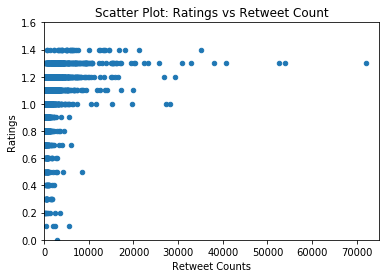

In [453]:
#reference = https://pandas.pydata.org/pandas-docs/version/0.15.0/visualization.html

df_twitter_master.plot(x='retweet_count', y='rating', kind='scatter')
plt.ylim(0,1.6)
plt.xlim(0,75000)
plt.xlabel('Retweet Counts')
plt.ylabel('Ratings')
plt.title('Scatter Plot: Ratings vs Retweet Count')

- From the above we can see their is a general correlation between the higher the rating leading to a higher volume of retweets.
- The most retweeted score seems to be 1.3.

#### 5) Correlation between the Ratings & Favorite Count

Text(0.5,1,'Scatter Plot: Ratings vs Favorite Count')

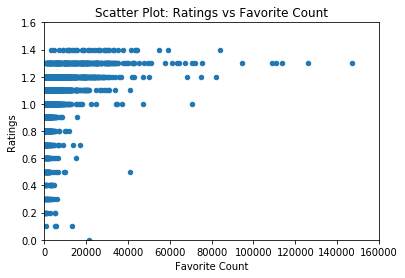

In [451]:
df_twitter_master.plot(x='favorite_count', y='rating', kind='scatter')
plt.ylim(0,1.6)
plt.xlim(0,160000)
plt.xlabel('Favorite Count')
plt.ylabel('Ratings')
plt.title('Scatter Plot: Ratings vs Favorite Count')

- Like with retweets there appears to be a tendency for the more favorited tweets to have ratings.
- Again 1.3 seems to have the highest amount, with it being the most favorited.

### Conclusions

 - 80% of the ratings are at least a 1.
 - The most retweeted & favorited dog breed is the Golden Retriever, which also has the highested SUMMED rating.
 - The dog breed with the highest MEAN rating is the Saluki.
 - By far the most most popular way to interact with the WeRateDogs twitter was by iPhone with over 93% of users utilising this source.
 - The higher the rating the more likely it was to be favorited & retweeted.